In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

omx = pd.read_csv('omx.csv')
dowjones = pd.read_csv('dji.csv')
nasdaq = pd.read_csv('ndq.csv')

def index(index):
    #convert Date-column to datetime so we can group the date
    index['Date'] = pd.to_datetime(index['Date'])
    index_start = index.groupby(pd.Grouper(key='Date',freq='M')).first()
    index_end = index.groupby(pd.Grouper(key='Date',freq='M')).last()

    # create a list for each month
    lst_jan, lst_feb, lst_mar, lst_apr, lst_may, lst_jun, lst_jul, lst_aug, lst_sep, lst_oct, lst_nov, lst_dec = [],[],[],[],[],[],[],[],[],[],[],[]

    dict_months_num = {'1': lst_jan, '2': lst_feb, '3': lst_mar, '4': lst_apr, '5': lst_may,
                   '6': lst_jun, '7': lst_jul, '8': lst_aug, '9': lst_sep, '10': lst_oct,
                   '11': lst_nov, '12': lst_dec}

    #Month that first data was collected.
    #All the month from Jan to that month 
    #will be assigned to NaN value
    month_num = index_start.index[0].month # first collected month
    for i in range(1, month_num, 1):
        #loop from January to first collected month
        dict_months_num[str(i)].append(np.nan)

    #loop through each month for i each year and
    #calculate the %-change for each month. 
    #Store the calculated value in respectivley list
    for i in range(len(index_start)):
        start = index_start.iloc[i,0]
        end  = index_end.iloc[i,3]
        percent = ((end-start)/start)*100
       # print('År: {}'.format(omx_start.index[i].year))
        if index_start.index[i].month  == 1:
            lst_jan.append(percent.round(2))
        if index_start.index[i].month  == 2:
            lst_feb.append(percent.round(2))
        if index_start.index[i].month  == 3:
            lst_mar.append(percent.round(2))
        if index_start.index[i].month  == 4:
            lst_apr.append(percent.round(2))
        if index_start.index[i].month  == 5:
            lst_may.append(percent.round(2))
        if index_start.index[i].month  == 6:
            lst_jun.append(percent.round(2))   
        if index_start.index[i].month  == 7:
            lst_jul.append(percent.round(2))
        if index_start.index[i].month  == 8:
            lst_aug.append(percent.round(2))
        if index_start.index[i].month  == 9:
            lst_sep.append(percent.round(2))
        if index_start.index[i].month  == 10:
            lst_oct.append(percent.round(2))
        if index_start.index[i].month  == 11:
            lst_nov.append(percent.round(2))
        if index_start.index[i].month  == 12:
            lst_dec.append(percent.round(2))

    #Month that last data was collected.
    #All the month from this month to Dec 
    #will be assigned to NaN value        
    month_num = index_start.index[-1].month #last collected month
    for i in range(month_num+1, 13, 1):
        #loop from last collected month+1 to December
        dict_months_num[str(i)].append(np.nan)

    #put all month lists in a dictioary    
    dict_month = {'jan': lst_jan, 'feb': lst_feb, 'mar': lst_mar, 'apr': lst_apr, 'may': lst_may,
                  'jun': lst_jun, 'jul': lst_jul, 'aug': lst_aug, 'sep': lst_sep, 'oct': lst_oct,
                 'nov': lst_nov, 'dec': lst_dec}
    
    #create a datafrme. Each row represent a year, each column represent a month
    df = pd.DataFrame(dict_month,index = set(index_start.index.year))
    df = df[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']]
    return df

df_nasdaq = index(nasdaq)
df_dowjones = index(dowjones)
df_omx = index(omx)




In [2]:
df_nasdaq.style.highlight_null('grey')

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
1984,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.37
1985,12.79,2.27,-2.07,0.39,3.67,1.65,1.82,-1.62,-5.72,4.24,7.17,3.5
1986,3.32,6.96,4.08,1.97,4.44,1.2,-8.75,2.79,-8.39,2.35,-0.39,-2.41
1987,11.61,7.92,1.2,-1.99,-0.5,2.21,2.45,5.01,-2.46,-27.54,-6.21,7.87
1988,2.86,6.01,1.96,1.47,-2.3,5.9,-1.75,-2.84,3.61,-0.57,-2.93,2.5
1989,5.91,-0.52,1.42,5.06,4.77,-2.57,4.44,3.1,0.64,-3.64,-0.02,-0.39
1990,-8.19,2.16,2.4,-2.66,8.77,0.61,-5.07,-12.91,-9.1,-5.5,9.28,3.52
1991,11.05,9.15,7.04,0.95,5.02,-5.91,5.02,4.66,0.11,3,-3.37,12.87
1992,6.93,2.08,-4.77,-3.33,0.96,-3.44,3.03,-2.85,3.69,4.15,8.11,4.05
1993,3.11,-3.9,2.87,-4.26,5.7,0.43,0.38,5.16,2.57,2.32,-3.33,2.22


In [3]:
df_dowjones.style.highlight_null('grey')

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
1985,0.71,0.55,-1.44,-0.53,4.63,1.08,1.01,-1.19,-0.38,3.36,7.29,5.12
1986,1.6,8.82,6.59,-2.09,5.56,0.99,-6.06,6.93,-7.13,5.78,1.79,-0.22
1987,13.55,3.3,3.43,0.41,0.41,4.72,6.72,4.52,-2.64,-23.37,-7.05,4.22
1988,0.29,5.01,-4.19,2.13,-0.05,5.54,-0.75,-4.45,4.44,1.79,-1.43,2.73
1989,8.28,-3.25,1.16,5.34,3.23,-1.52,8.65,2.67,-1.45,-1.77,2.49,1.49
1990,-5.75,1.28,3.26,-1.02,7.8,-0.7,0.76,-10.16,-5.34,-1.29,4.83,2.39
1991,4.15,5.37,1.9,-0.49,4.34,-3.85,3.39,0.69,-0.83,1.42,-5.88,10.56
1992,2.26,1.37,-0.99,3.82,1.13,-2.31,2.26,-4.02,0.44,-1.39,2.45,-0.12
1993,0.27,1.84,1.91,-0.22,2.56,-0.32,0.66,3.16,-2.63,3.53,0.09,1.87
1994,5.97,-3.68,-5.12,1.3,2.08,-3.55,3.85,3.96,-1.79,1.69,-4.31,2.55


In [4]:
df_omx.style.highlight_null('grey')

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
1991,nan,nan,nan,nan,nan,nan,-0.53,-1.75,-6.37,-1.19,-7.95,-0.15
1992,5.46,-0.13,3.26,-0.78,2.24,-8.67,-4.64,-9.4,-4.49,1.39,28.76,2.28
1993,-4.88,9.05,-3.12,3.53,7.09,0.14,10.18,7.01,2.99,9.96,-8.63,4.98
1994,10.28,-3.36,-7.76,5.85,-0.75,-6.74,7.33,-1.45,-3.7,6.32,2.09,-2.59
1995,0.3,-1.37,-2.35,7.24,1.88,1.95,3.41,2.25,7.28,-6.59,2.36,-1.77
1996,1.73,6.4,0.56,1.92,2.53,-0.38,-5.7,5.81,4.22,1.48,8.13,3.74
1997,7.1,4.24,4.39,-0.19,5.05,8.65,6.86,-6.54,6.08,-12.68,2.75,-3.96
1998,4.58,6.99,5.31,-74.8,3.88,1.43,-2.26,-14.48,-8.47,10.51,8.87,1.68
1999,3,-0.05,3.42,4.12,-2.51,7.3,-1.66,2.23,-1.01,10.53,11.9,13.41
2000,0.7,13.63,-5.47,4.43,-3.67,-4.51,-1.69,2.01,-10.31,-4.44,-7.98,-5.7


In [5]:
def table_avg(df):
    """
    Input: Index data frame
    Function: mean value are stored in one of the four empty lists, depending on the number of numbers that are used to average.
    """
    five_yr, ten_yr, fifthteen_yr, twenty_yr = [],[],[],[]
    for i in range(12):
        five_yr.append(df.iloc[-6:-1,i].mean().round(2))
        ten_yr.append(df.iloc[-11:-1,i].mean().round(2))
        fifthteen_yr.append(df.iloc[-16:-1,i].mean().round(2))
        twenty_yr.append(df.iloc[-21:-1,i].mean().round(2))  
    df_yr = pd.DataFrame({'Avg 5 years': five_yr,
                         'Avg 10 years': ten_yr,
                         'Avg 15 years': fifthteen_yr,
                         'Avg 20 years': twenty_yr}, index = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] )

    df_yr = df_yr[['Avg 5 years','Avg 10 years', 'Avg 15 years', 'Avg 20 years']]
    return df_yr


df_dowjones_avg = table_avg(df_dowjones)
df_omx_avg = table_avg(df_omx)
df_nasdaq_avg = table_avg(df_nasdaq)


In [17]:
def barplot(df, title):
    barWidth = 0.20
    # Set position of bar on X axis
    r1 = np.arange(len(df))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    plt.figure(figsize=(10,8))

    plt.bar(r1,df['Avg 5 years'], width=barWidth,color='#70dbdb',edgecolor='white', label='Avg 5 years')
    plt.bar(r2,df['Avg 10 years'], width=barWidth,color='#1f7a7a',edgecolor='white', label='Avg 10 years')
    plt.bar(r3,df['Avg 15 years'], width=barWidth,color='#145252',edgecolor='white', label='Avg 15 years')
    plt.bar(r4,df['Avg 20 years'], width=barWidth,color='#051414',edgecolor='white', label='Avg 20 years')

    plt.xticks([r + barWidth for r in range(len(df))], ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.xticks(color='black')
    plt.yticks(color='black')
    plt.ylabel('Percent [%]', color='black')
    plt.xlabel('Months', color='black')
    plt.title(title, color='black')
    plt.legend()
    plt.show()

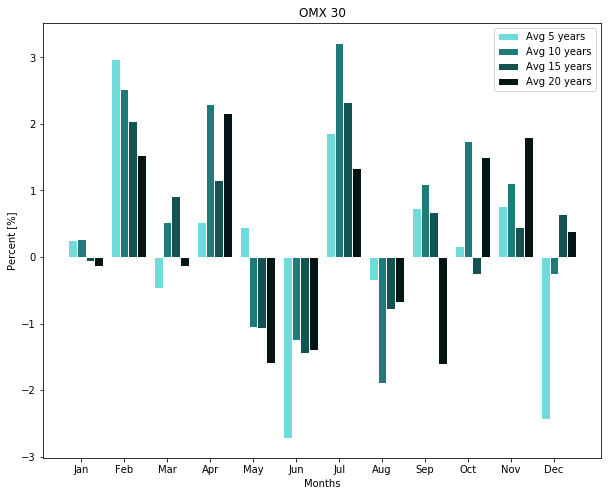

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Avg 5 years,0.25,2.97,-0.47,0.53,0.45,-2.72,1.86,-0.35,0.73,0.17,0.76,-2.44
Avg 10 years,0.27,2.53,0.53,2.30,-1.05,-1.24,3.22,-1.90,1.09,1.75,1.11,-0.25
Avg 15 years,-0.06,2.05,0.91,1.15,-1.07,-1.44,2.33,-0.78,0.67,-0.25,0.45,0.64
Avg 20 years,-0.13,1.53,-0.14,2.17,-1.60,-1.40,1.33,-0.68,-1.61,1.50,1.81,0.39


In [18]:
barplot(df_omx_avg, 'OMX 30')
df_omx_avg.transpose()

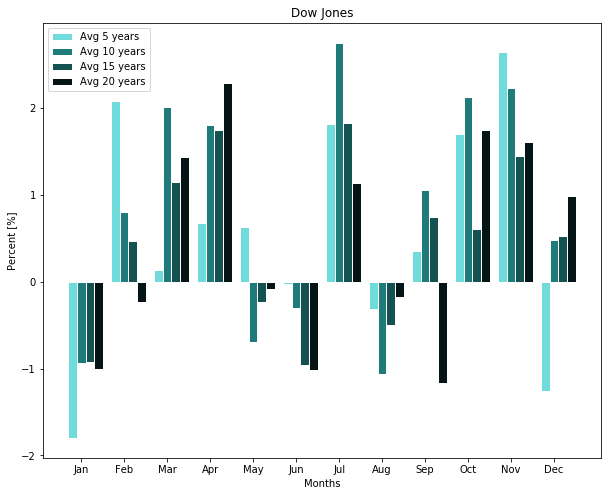

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Avg 5 years,-1.80,2.08,0.13,0.68,0.63,-0.03,1.81,-0.32,0.35,1.70,2.64,-1.26
Avg 10 years,-0.94,0.80,2.01,1.80,-0.69,-0.30,2.75,-1.06,1.06,2.13,2.23,0.48
Avg 15 years,-0.92,0.47,1.15,1.75,-0.23,-0.96,1.83,-0.50,0.74,0.61,1.45,0.53
Avg 20 years,-1.01,-0.23,1.43,2.29,-0.09,-1.02,1.14,-0.18,-1.17,1.74,1.61,0.98


In [8]:
barplot(df_dowjones_avg, 'Dow Jones')
df_dowjones_avg.transpose()

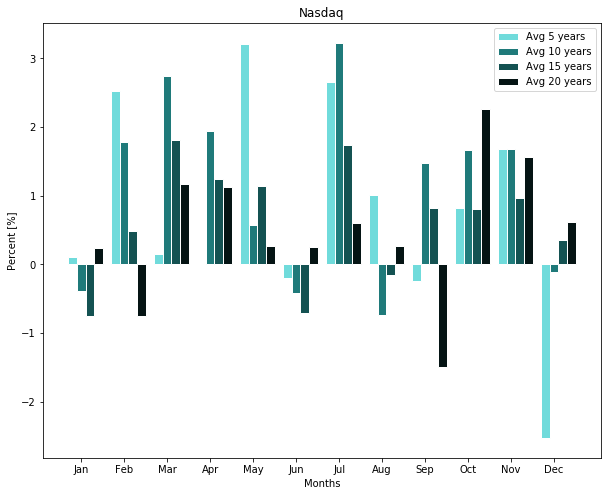

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Avg 5 years,0.11,2.53,0.15,-0.00,3.21,-0.20,2.65,1.01,-0.24,0.82,1.68,-2.53
Avg 10 years,-0.39,1.79,2.75,1.95,0.57,-0.41,3.23,-0.74,1.48,1.67,1.68,-0.11
Avg 15 years,-0.75,0.49,1.81,1.25,1.14,-0.71,1.74,-0.15,0.82,0.81,0.96,0.35
Avg 20 years,0.24,-0.75,1.17,1.13,0.27,0.26,0.60,0.27,-1.50,2.26,1.56,0.62


In [9]:
barplot(df_nasdaq_avg, 'Nasdaq')
df_nasdaq_avg.transpose()